## Homework - Week 8 (due October 18)

### 1. Curve Fitting

* start with ``inputdata.txt`` located in the week 8 homework folder

* read in these data with ``np.loadtxt``

* visualize the data using a very simple matplotlib call:
 
  i.e.
  
  ```
  import matplotlib.pyplot as plt
  
  
  plt.scatter([variable name for x],[variable name for y])
  
  ```
  
  What kind of function does this look like? (note: the answer is functionally simple and involves two coefficients and one variable)
  
  
* Fit the data with ``curve_fit``.   To do this, define a simple function whose form is based on your answer to the previous item.  Report the values for the two coefficients needed to fit the data.

* Compare your solution by plotting the data (as in item 3) with the functional fit overplotted (don't worry about nice-looking formatting: just the data + function are good enough)

* Why might the fit not look perfect?



[3.49722912 1.33761025]


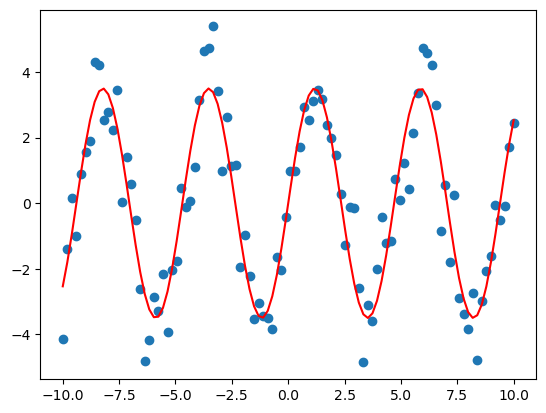

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x,y = np.loadtxt('inputdata.txt', unpack=True)

plt.scatter(x,y)

def func(x,a,b):
    return a*np.sin(x*b)

param, param_cov = curve_fit(func, x, y)
print(param)
plt.plot(x,func(x,param[0],param[1]), 'r-')



#fit isn't perfect because it is using a least-squares optimization fit. 
#if we wanted a perfect fit, we'd use np.interp

### 2. Basic Statistics with SciPy and NumPy

The file ``diskmasses.txt`` now found in the problem set directory for this section contains estimates for the masses (er, log(disk mass)) of protoplanetary disks for a large number of stars in the Taurus-Aurigae star-forming region.   

* Read in this file using ``np.loadtxt``.  
* Compute the mean, median, and _sample_ variance of the log(disk mass) with NumPy .   
* Compute the 25th and 75th percentile for log(disk mass).



In [1]:
import numpy as np

diskmasses = np.loadtxt('diskmasses.txt',dtype=str)

dmfloat = np.asarray(diskmasses[:,-1],dtype=float)

mean = np.mean(dmfloat)

med = np.median(dmfloat)

p25 = np.percentile(dmfloat,25)

p75 = np.percentile(dmfloat,75)

sample_var = np.var(dmfloat,ddof=1)


### 3. Binomial and Poisson Statistics: Confidence Intervals

Evaluate this statement [note: the numbers are made up]:

"In our study of the Blanco 1 open cluster from the Spitzer Space Telescope, we detect debris disks around 5 A stars out of a sample of 25.   Thus, the disk fraction around A stars in Blanco 1 is 20% $\pm$ 9.8%.   

At the 68.2% confidence limit (1-$\sigma$ for a normal distribution), this disk fraction is slightly lower than 30% found in the sum-total of other open clusters of comparable ages".

* **This statement is grammatically correct**
* **study should not use poisson statistics for this sample size**

### 4. Goodness-of-Fit, $\chi_{}^{2}$


Consider ...

 * a model with two free parameters fit to 115 data points, yielding a $\chi^{2}$ statistic of 127.
 * a model with one free parameter fit to 15 data points with a  $\chi^{2}$ statistic of 26.

 
 - Compute the $p$ values for both model fits.
 - Which models are consistent with the data at the 1-$\sigma$ confidence limit?  At 3-$\sigma$?


In [1]:
import numpy as np
from scipy.stats import chi2
#If we take the 1-CDF we get the p-value for a particular chi**2 distribution
chisqval1 = 127
ndp1 = 115
dof1 = 2
cdf1 = chi2.cdf(chisqval1,dof1)
p1 = 1 - cdf1
print("P-value for first scenario is ",p1)
print('')
chisqval2 = 26
ndp2 = 15
dof2 = 1
cdf2 = chi2.cdf(chisqval2,dof2)
p2 = 1 - cdf2
print("P-value for second scenario is ",p2)


P-value for first scenario is  0.0

P-value for second scenario is  3.4141735771875403e-07


### 5. Goodness-of-Fit, $\chi_{\nu}^{2}$

See the attached figure panel comparing the spectrum of a brown dwarf to a library of other substellar objects.   Assume that each model fit loses one degree of freedom (so $\nu$ = 1). 

- Compute the $\chi^{2}$ values for the three model fits.
- Compute the $p$ values for the three model fits.  


### 6. Student's t-distribution

Use the ``def tpenalty`` function as a starting point ...

* Assume that you are computing a contrast curve with an instrument that uses only half of the field of view. 

* What is the contrast penalty at a distance of 2.5 $\lambda$/D from the star?
